In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,8,6,10,6,7,2,2,2,3,...,1,0,0,0,0,0,0,0,0,Chell
1,1,13,1,13,9,8,8,2,3,2,...,4,1,2,1,0,1,0,0,0,Engineer
2,2,16,7,6,7,9,3,4,2,6,...,0,0,0,0,1,0,0,0,0,Grove
3,3,8,11,10,11,3,7,0,4,2,...,0,0,1,0,0,0,2,1,0,Davisson
4,4,10,11,8,5,3,4,2,5,5,...,0,0,0,0,0,0,0,0,0,Wilson


In [31]:
scaler = StandardScaler()
scaler.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.transform(df.drop('Class', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,-1.729743,-0.667148,-0.410182,0.966760,-0.129906,0.265447,-0.935059,-0.434196,-0.695732,0.027828,...,-0.384867,1.109292,-0.397250,-0.323400,-0.394041,-0.450704,-0.430273,-0.390662,-0.462312,-0.375244
1,-1.725124,0.208221,-1.850427,1.857874,0.645397,0.574107,1.189003,-0.434196,-0.264849,-0.446508,...,-0.384867,5.511243,1.537411,3.045354,1.365069,-0.450704,1.561732,-0.390662,-0.462312,-0.375244
2,-1.720505,0.733443,-0.122133,-0.221392,0.128528,0.882767,-0.581049,0.067571,-0.695732,1.450834,...,-0.384867,-0.358025,-0.397250,-0.323400,-0.394041,1.597949,-0.430273,-0.390662,-0.462312,-0.375244
3,-1.715887,-0.667148,1.030063,0.966760,1.162266,-0.969191,0.834993,-0.935964,0.166034,-0.446508,...,3.268934,-0.358025,-0.397250,1.360977,-0.394041,-0.450704,-0.430273,3.886663,1.553584,-0.375244
4,-1.711268,-0.317001,1.030063,0.372684,-0.388341,-0.969191,-0.227039,-0.434196,0.596917,0.976499,...,-0.384867,-0.358025,-0.397250,-0.323400,-0.394041,-0.450704,-0.430273,-0.390662,-0.462312,-0.375244


In [34]:
df_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv')
df_test_feat = pd.DataFrame(df_test, columns=df.columns[:-1])

In [35]:
X_train = df_feat
X_test = df_test_feat
y_train = df['Class']

In [3]:
h = .02  # step size in the mesh

alphas = np.logspace(-5, 2, 7)
names = ['alpha ' + str(i) for i in alphas]

In [25]:
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

In [41]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

[]

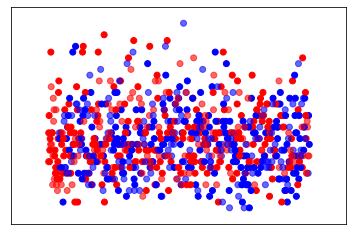

In [42]:
ax = plt.subplot(1, 1,1)
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [43]:
clf = MLPClassifier(max_iter=500,activation="logistic")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [44]:
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10001 is different from 2)

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
accuracy_score(y_test, pred_mlpc)



print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))



scaler = StandardScaler()
scaler.fit(df.drop('quality', axis=1))
scaled_features = scaler.transform(df.drop('quality', axis=1))



X = df.drop('quality', axis=1)
Y = df.quality.astype(float)




h = .02  # step size in the mesh

alphas = np.logspace(-5, 2, 7)
names = ['alpha ' + str(i) for i in alphas]
alphas
modes = ["identity","logistic","tanh","relu"]



X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)


alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
modes = ["identity","logistic","tanh","relu"]
solv = ["adam","sgd","lbfgs"]


#alphas = [1e-5]
#modes = ["identity","logistic","tanh","relu"]
#modes = ["logistic"]
#solv = ["adam","sgd","lbfgs"]
#solv = ["adam"]
erg = []
for i in alphas:
    for j in modes:
        for k in solv:
            clf = MLPClassifier(max_iter=500,activation=j)
            #clf = MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=300, alpha=i,solver='sgd', verbose=10,  random_state=21,tol=0.000000001,activation=j)
            clf.fit(X_train, Y_train)
            Y_pred = clf.predict(X_test)
            print("alpha: ",i,"mode: ",j,"solver: ",k,"score: ",accuracy_score(Y_test, Y_pred))
            erg.append("alpha:")
            erg.append(i)
            erg.append("mode:")
            erg.append(j)
            erg.append("solver:")
            erg.append(k)
            erg.append("score:")
            erg.append(accuracy_score(Y_test, Y_pred))
    print("")


# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))


                        ax = plt.subplot(1,1, 1)
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())



Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)